In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
!pip install --upgrade xlrd

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
train_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2005 Data')
test_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2007 Data')

Saving Lab3_data.xls to Lab3_data (1).xls


In [ ]:
train_df.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [ ]:
class LogisticRegression:
    def __init__(self, X, y, learningRate, tolerance, maxIteration):
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0]]), X])
    
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        return cost
    
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            curr = self.costFunction(X, y)
            
            diff = last - curr
            last = curr
            
            errors.append(curr)
            if diff< self.tolerance:
                print("Model stopped")
                break
                
        self.plot_cost(errors)### plot Function
        
        
    def predict(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        precision = (y & y_hat).sum() / y_hat.sum()
        
        recall = (y & y_hat).sum() / y.sum()
        fScore = 2 * (precision * recall) / (precision + recall)
        
        return fScore, recall, precision
    
    def run_model(self):
        self.w = np.ones(self.X.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X, self.y)
        self.X_train = self.X
        self.y_train = self.y
        print(self.w)
        
        y_hat_train = self.predict(self.X, self.y)
        fScore, recall, precision = self.evaluate(self.y, y_hat_train)
        
        print('F1_score: ', fScore)
        print('Recall: ', recall)
        print('Precison: ', precision)
        
        
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

    def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()
        
    

In [ ]:
train_X, train_y = train_df.values[:, 1:], train_df.values[:, 0]
test_X, test_y = test_df.values[:, 1:], test_df.values[:, 0]

In [ ]:
lr = LogisticRegression(train_X, train_y, learningRate = 0.0000001,
                       tolerance = 0.000005, maxIteration = 500000)

100%|██████████| 500000/500000 [00:16<00:00, 30035.17it/s]
No handles with labels found to put in legend.


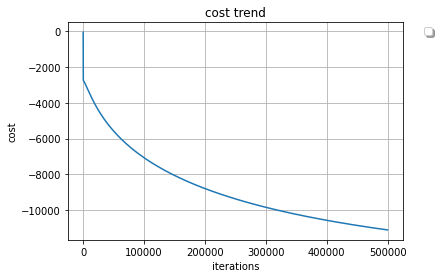

[-0.47594418  0.23070829]
F1_score:  0.9722222222222222
Recall:  0.9722222222222222
Precison:  0.9722222222222222


In [ ]:
lr.run_model()

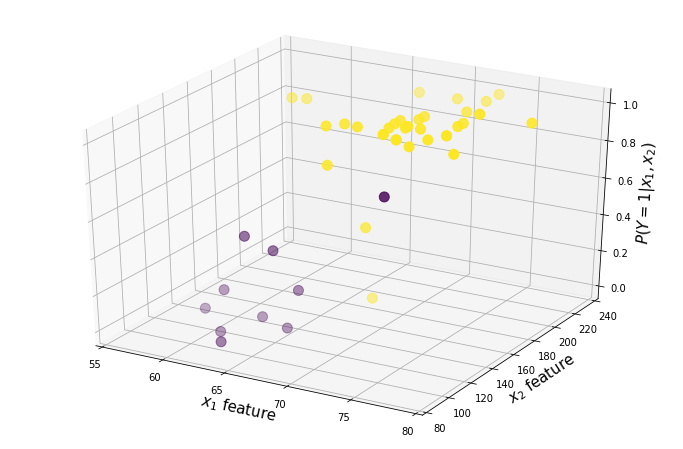

In [ ]:
lr.plot()

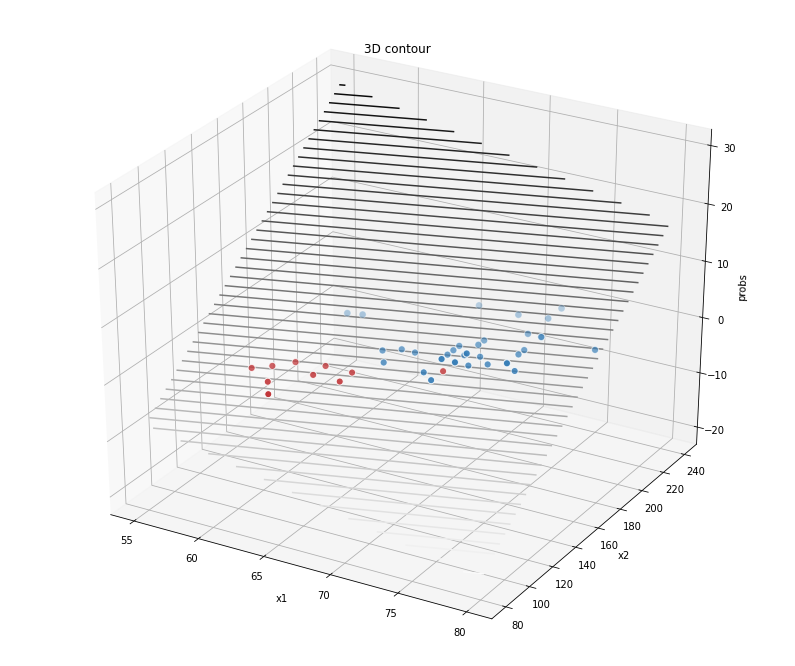

In [ ]:
lr.plot3D()

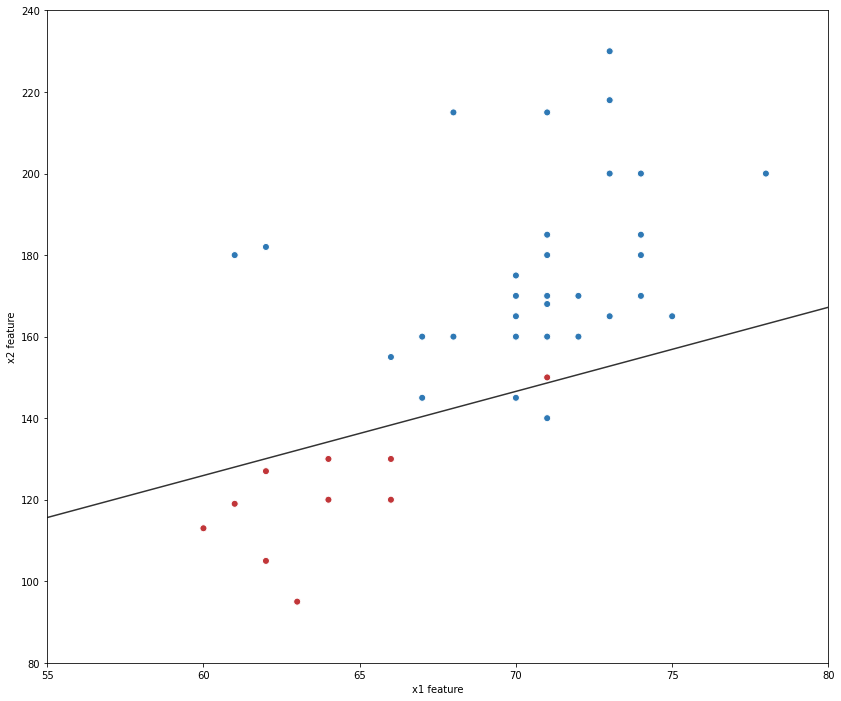

In [ ]:
lr.scatterPlt()

In [ ]:
## Naive

In [ ]:
from sklearn.datasets import make_blobs
from scipy.stats import norm

In [ ]:
X, y = make_blobs(n_samples = 10000, centers = 2, n_features = 2, random_state = 1)
X

array([[-3.08389358,  5.70067218],
       [-8.80258525, -5.07389013],
       [-1.68452735,  5.22511143],
       ...,
       [-8.65168502, -5.58805662],
       [-1.41968841,  3.76555241],
       [-9.9077506 , -3.42556702]])

In [ ]:
class NaiveBayes:
    def __init__(self, X, y) -> None:
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, 
                                                                                random_state = 0)
    
    def fit_distribution(self, data):
        mean = np.mean(data)
        sigma = np.std(data)
        
        dist = norm(mean, sigma)
        return dist
    
    def probability(self, X, prior, dist1, dist2):
        return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])
    
    def fit(self):
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        
        
        self.prior_y0 = len(self.X0_train) / len(self.X)
        self.prior_y1 = len(self.X1_train) / len(self.X)
        
        self.dist_X0y0 = self.fit_distribution(self.X0_train[:,0])
        self.dist_X1y0 = self.fit_distribution(self.X0_train[:,1])
        
        self.dist_X0y1 = self.fit_distribution(self.X1_train[:,0])
        self.dist_X1y1 = self.fit_distribution(self.X1_train[:,1])
        
        
    def predict(self):
        count = 0
        for sample, target in zip(self.X_test, self.y_test):
            py0 = self.probability(sample, self.prior_y0, self.dist_X0y0, self.dist_X1y0)
            py1 = self.probability(sample, self.prior_y1, self.dist_X0y1, self.dist_X1y1)
            
            print("P(y=0|%s) = %.3f" % (sample, py0*100))
            print("P(y=1|%s) = %.3f" % (sample, py1*100))
        
            print('Model predicted class {} and the truth was: {}\n'.format(np.argmax([py0*100,
                                                                                  py1*100]), target))
            if np.argmax([py0*100,py1*100]) != target:
                count +=1
        print(count)

In [ ]:
nb = NaiveBayes(X, y)

In [ ]:
nb.fit()

In [ ]:
nb.predict()